In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display

import warnings
warnings.filterwarnings('ignore')

from matplotlib import rcParams
from matplotlib.pyplot import figure
sns.set(style="darkgrid")

rcParams['figure.figsize'] = 12,6
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [8]:
data_train = pd.read_csv('train.csv')
data_predict = pd.read_csv('predict2022.csv')

In [9]:
dft = data_train.copy()
dfp = data_predict.copy()

In [10]:
dfp_ori = data_predict.copy()

# EDA 

## Data Train 2021

In [11]:
dft.sample(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
16622,35574,Analytics,region_7,NaN,m,other,1,26,5.0,2,0,85,0
12345,48733,Procurement,region_2,Bachelor's,m,referred,1,36,3.0,7,0,66,0
34988,15883,HR,region_29,Bachelor's,m,other,1,28,NaN,1,1,53,1
21762,54093,Operations,region_2,Master's & above,m,other,1,31,5.0,5,0,64,0
19707,72395,Sales & Marketing,region_29,Bachelor's,m,other,1,27,4.0,1,0,44,0


In [12]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40100 entries, 0 to 40099
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           40100 non-null  int64  
 1   department            40100 non-null  object 
 2   region                40100 non-null  object 
 3   education             38332 non-null  object 
 4   gender                40100 non-null  object 
 5   recruitment_channel   40100 non-null  object 
 6   no_of_trainings       40100 non-null  int64  
 7   age                   40100 non-null  int64  
 8   previous_year_rating  37076 non-null  float64
 9   length_of_service     40100 non-null  int64  
 10  awards_won?           40100 non-null  int64  
 11  avg_training_score    40100 non-null  int64  
 12  is_promoted           40100 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 4.0+ MB


In [13]:
np.where(dft.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [14]:
dft.rename(columns={'awards_won?':'awards_won'}, inplace=True)

In [15]:
dft['employee_id'].nunique()

40100

In [16]:
dft.duplicated().sum()

0

In [17]:
dft.duplicated(subset=['employee_id','gender']).sum()

0

**Conc** : All employee ID is unique

In [18]:
dft.isnull().sum()

employee_id                0
department                 0
region                     0
education               1768
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    3024
length_of_service          0
awards_won                 0
avg_training_score         0
is_promoted                0
dtype: int64

handle 'previous_year_rating'

In [19]:
dft['previous_year_rating'].isnull().sum()/len(dft['employee_id'])*100

7.541147132169576

In [20]:
dft[dft.previous_year_rating.isna() & dft.length_of_service>1]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted


In [21]:
dft[dft.previous_year_rating.isna() & dft.is_promoted==1].sample(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
6120,55682,Analytics,region_22,NaN,m,other,2,26,NaN,1,1,82,1
32303,70680,HR,region_22,Bachelor's,m,sourcing,1,28,NaN,1,0,51,1
26087,17576,Sales & Marketing,region_7,NaN,m,other,6,25,NaN,1,0,50,1
26330,742,Technology,region_22,Bachelor's,m,other,1,26,NaN,1,0,80,1
39305,54045,R&D,region_22,Bachelor's,m,sourcing,1,30,NaN,1,1,88,1


**Conc** : Employees that don't have rating is new employee (length of service is 1 year) and from history they still have a chance to get promoted. So we don't want to drop because is not fair for them. We will try to give them review with neutral value.

In [22]:
display.Image('1-5 rating.png', width=500, height=300)

FileNotFoundError: No such file or directory: '1-5 rating.png'

FileNotFoundError: No such file or directory: '1-5 rating.png'

<IPython.core.display.Image object>

In [23]:
dft['previous_year_rating'] = dft['previous_year_rating'].fillna(3)

In [24]:
dft['education'].unique()

array([nan, "Bachelor's", "Master's & above", 'Below Secondary'],
      dtype=object)

In [25]:
dft[dft.education.isna()].sample(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
24560,22964,Sales & Marketing,region_15,NaN,m,sourcing,1,30,3.0,3,0,48,0
31978,78081,Sales & Marketing,region_7,NaN,m,other,2,24,3.0,3,0,48,0
23745,1013,Analytics,region_22,NaN,m,sourcing,2,27,5.0,1,0,82,0
14048,69898,Operations,region_2,NaN,f,other,1,58,3.0,4,0,53,0
32917,29299,Operations,region_15,NaN,m,other,1,37,3.0,3,0,62,0


handle 'education'

In [26]:
dft['education'].isnull().sum()/len(dft['employee_id'])*100

4.4089775561097255

Only 4.4% from data, we'll drop them.

In [27]:
dft.dropna(inplace=True)

In [28]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38332 entries, 1 to 40099
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           38332 non-null  int64  
 1   department            38332 non-null  object 
 2   region                38332 non-null  object 
 3   education             38332 non-null  object 
 4   gender                38332 non-null  object 
 5   recruitment_channel   38332 non-null  object 
 6   no_of_trainings       38332 non-null  int64  
 7   age                   38332 non-null  int64  
 8   previous_year_rating  38332 non-null  float64
 9   length_of_service     38332 non-null  int64  
 10  awards_won            38332 non-null  int64  
 11  avg_training_score    38332 non-null  int64  
 12  is_promoted           38332 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 4.1+ MB


## Data Predict 2022

In [29]:
dfp.sample(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
4829,34287,Technology,region_28,Bachelor's,f,sourcing,1,28,3.0,6,0,75
10801,52656,Sales & Marketing,region_13,Bachelor's,m,other,1,41,5.0,6,0,55
1987,12378,Sales & Marketing,region_7,Master's & above,f,other,1,43,1.0,14,0,51
11858,53525,Analytics,region_2,Bachelor's,m,other,1,28,1.0,6,0,85
11226,58529,Operations,region_4,Bachelor's,f,other,1,36,5.0,5,0,54


In [30]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14707 entries, 0 to 14706
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           14707 non-null  int64  
 1   department            14707 non-null  object 
 2   region                14707 non-null  object 
 3   education             14066 non-null  object 
 4   gender                14707 non-null  object 
 5   recruitment_channel   14707 non-null  object 
 6   no_of_trainings       14707 non-null  int64  
 7   age                   14707 non-null  int64  
 8   previous_year_rating  13607 non-null  float64
 9   length_of_service     14707 non-null  int64  
 10  awards_won?           14707 non-null  int64  
 11  avg_training_score    14707 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 1.3+ MB


In [31]:
dfp.rename(columns={'awards_won?':'awards_won'}, inplace=True)

In [32]:
np.where(dfp.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [33]:
dfp['employee_id'].nunique()

14707

In [34]:
dfp.duplicated().sum()

0

In [35]:
dfp.duplicated(subset=['employee_id','gender','department']).sum()

0

**Conc** : All employee ID is unique

In [36]:
dfp.isnull().sum()

employee_id                0
department                 0
region                     0
education                641
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1100
length_of_service          0
awards_won                 0
avg_training_score         0
dtype: int64

In [37]:
dfp['previous_year_rating'].isnull().sum()/len(dfp['employee_id'])*100

7.479431563201197

In [38]:
dfp[dfp.previous_year_rating.isna() & dfp.length_of_service>1]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score


We fill rating that missing with 3 like data training 2021

In [39]:
dfp['previous_year_rating'] = dfp['previous_year_rating'].fillna(3)

In [40]:
dfp['education'].isnull().sum()/len(dfp['employee_id'])*100

4.358468756374516

We'll drop too data missing in education like in data 2021

In [41]:
dfp.dropna(inplace=True)

In [42]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14066 entries, 0 to 14705
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           14066 non-null  int64  
 1   department            14066 non-null  object 
 2   region                14066 non-null  object 
 3   education             14066 non-null  object 
 4   gender                14066 non-null  object 
 5   recruitment_channel   14066 non-null  object 
 6   no_of_trainings       14066 non-null  int64  
 7   age                   14066 non-null  int64  
 8   previous_year_rating  14066 non-null  float64
 9   length_of_service     14066 non-null  int64  
 10  awards_won            14066 non-null  int64  
 11  avg_training_score    14066 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 1.4+ MB


## Looking for insight

In [43]:
dft['employee_id'].isin(dfp['employee_id']).sum()

0

**Conc** = Data Train 2021 & Data Predict 2022 is contain different employee

### Age Categorize

We need to categorize the age to see comparison the customers by age groups. 
Age categorize refers to Dyussenbayev, A. (2017). Age Periods Of Human Life. Advances in Social Sciences Research Journal.
<img src="image_age.png" width=300 height=300 />

In [44]:
#Data 2022
dfp['age_cats'] = pd.cut(dfp.age,
                 [0, 25, 44, 60, 75, 90],
                 labels=['teen','young age','middle age','eldery age','senile age'])
dfp_age = dfp.groupby('age_cats').agg({'employee_id':'count'}).reset_index()
dfp_age['Percentage'] = dfp_age['employee_id'].apply(lambda x:round(x/dfp_age['employee_id'].sum()*100,2))

In [45]:
dfp_age.head()

,age_cats,employee_id,Percentage
0,teen,645,4.59
1,young age,11773,83.70
2,middle age,1648,11.72
3,eldery age,0,0.00
4,senile age,0,0.00


Text(0.5, 0, 'Age Classifications')

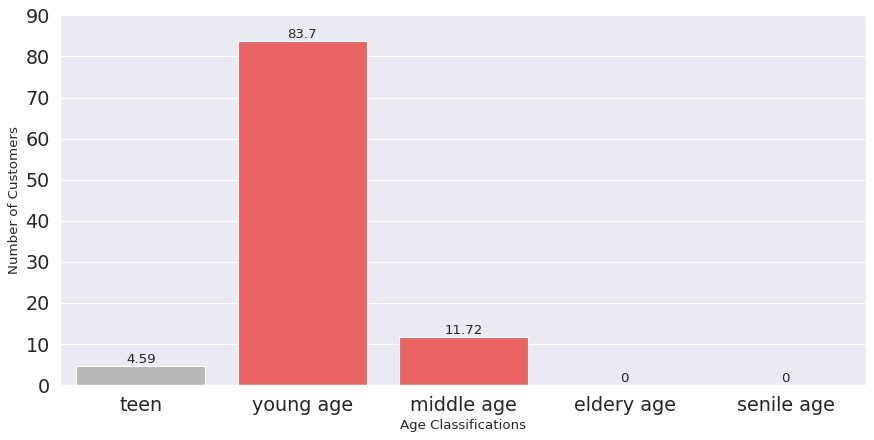

In [46]:
flatui = ["#b8b8b8", "#ff4d4d", "#ff4d4d", "#ff4d4d", "#b8b8b8"]
sns.set_palette(flatui)

figure(figsize=(13, 6), dpi=80)

ax = sns.barplot(x='age_cats',y='Percentage',data=dfp_age,  palette =sns.color_palette())
ax.bar_label(ax.containers[0])
ax.set_ylim(0,90)
plt.ylabel('Number of Customers')
plt.xlabel('Age Classifications')
#plt.title('Comparison of Employee by Age (%)', fontsize=16)

In [47]:
dfp_age_dep = dfp.groupby(['department','age_cats']).agg({'employee_id':'count'}).reset_index()
dfp_age_dep = dfp_age_dep[dfp_age_dep.employee_id > 1].reset_index()

In [48]:
dfp_age_dep.drop(columns=['index'], axis=1, inplace=True)
dfp_age_dep

,department,age_cats,employee_id
0,Analytics,teen,34
1,Analytics,young age,1225
2,Analytics,middle age,76
3,Finance,teen,60
4,Finance,young age,554
5,Finance,middle age,43
6,HR,teen,64
7,HR,young age,516
8,HR,middle age,93
9,Legal,teen,7


In [49]:
#sadfsafasdf
total = []
for i in dfp_age_dep['department']:
    a = dfp_age_dep[dfp_age_dep.department == i]['employee_id'].sum()
    total.append(a)

In [50]:
dfp_age_dep['total'] = pd.Series(total)

In [51]:
dfp_age_dep['percent'] = round(dfp_age_dep['employee_id']/dfp_age_dep['total']*100,2)

In [52]:
dfp_age_dep.head()

,department,age_cats,employee_id,total,percent
0,Analytics,teen,34,1335,2.55
1,Analytics,young age,1225,1335,91.76
2,Analytics,middle age,76,1335,5.69
3,Finance,teen,60,657,9.13
4,Finance,young age,554,657,84.32


Text(0.5, 0, 'Departement')

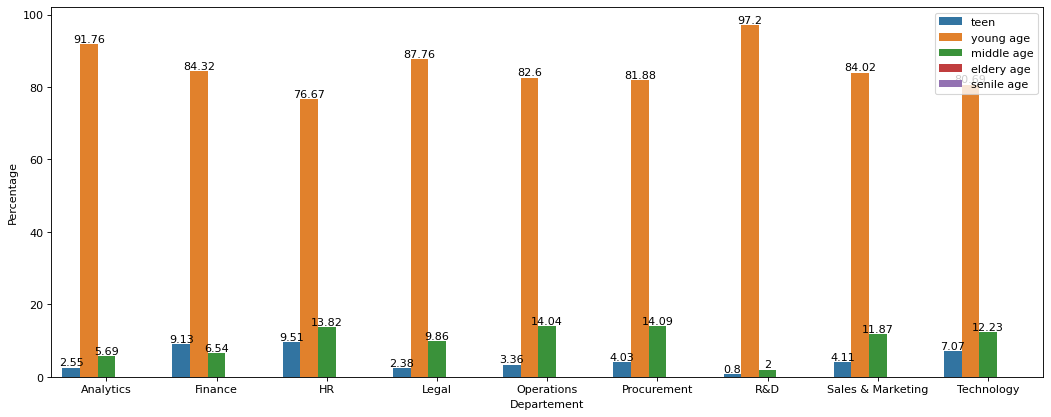

In [53]:
plt.rcdefaults()
figure(figsize=(16, 6), dpi=80)

ax1 = sns.barplot(x='department',y='percent',data=dfp_age_dep, hue='age_cats')
ax1.bar_label(ax1.containers[0])
ax1.bar_label(ax1.containers[1])
ax1.bar_label(ax1.containers[2])
#ax.set_ylim(0,90)
plt.legend()
plt.ylabel('Percentage')
plt.xlabel('Departement')
#plt.title('Comparison of Employee by Age per Departement (%)', fontsize=16)

**Conc =** 
- Generaly All departements have composition age cats are good. Young Age take domination which are they can give contribution of newa idea. But it has to be managed because these young age will become middle age and the middle age will become eldery.
- R&D as a division who need to be more up to date is taking the most young age composition, 97.2%.

In [54]:
dfp.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,age_cats
0,3387,Procurement,region_15,Bachelor's,f,other,1,36,3.0,3,0,69,young age
1,67479,Sales & Marketing,region_7,Bachelor's,m,sourcing,2,31,5.0,4,0,51,young age
2,8070,Operations,region_13,Bachelor's,f,sourcing,1,40,3.0,13,0,63,young age
3,46497,Analytics,region_26,Bachelor's,m,other,1,31,1.0,4,0,85,young age
4,54990,Operations,region_28,Bachelor's,m,sourcing,1,24,3.0,1,0,55,teen


In [55]:
dfp.groupby('education').agg({'employee_id':'count'})

,employee_id
education,
Bachelor's,9843
Below Secondary,200
Master's & above,4023


In [56]:
dfp_ed = dfp.groupby(['department','education']).agg({'employee_id':'count'}).reset_index()
dfp_ed.rename(columns={'employee_id':'count'}, inplace=True)


In [57]:
dfp_ed.head()

,department,education,count
0,Analytics,Bachelor's,1068
1,Analytics,Master's & above,267
2,Finance,Bachelor's,493
3,Finance,Below Secondary,20
4,Finance,Master's & above,144


In [58]:
tot_ed = []
for i in dfp_ed['department']:
    a = dfp_ed[dfp_ed.department == i]['count'].sum()
    tot_ed.append(a)

In [59]:
dfp_ed['tot_emp'] = pd.Series(tot_ed)

In [60]:
dfp_ed['percent'] = round(dfp_ed['count']/dfp_ed['tot_emp']*100,2)
dfp_ed.sample(5)

,department,education,count,tot_emp,percent
12,Operations,Below Secondary,48,3006,1.60
21,Technology,Bachelor's,1256,1880,66.81
15,Procurement,Below Secondary,39,1860,2.10
18,R&D,Master's & above,107,250,42.80
8,Legal,Bachelor's,225,294,76.53


### Education 

Text(0.5, 0, '')

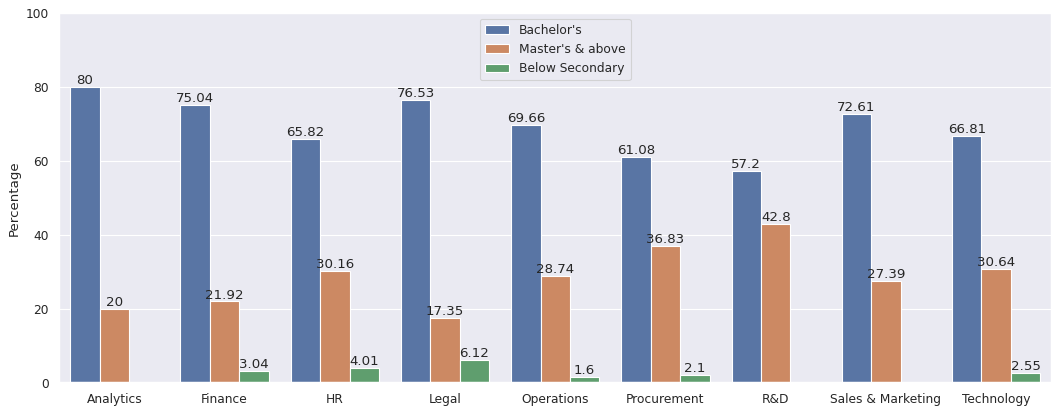

In [61]:
sns.set(style="darkgrid")
figure(figsize=(16, 6), dpi=80)

ax1 = sns.barplot(x='department',y='percent',data=dfp_ed, hue='education')
ax1.bar_label(ax1.containers[0])
ax1.bar_label(ax1.containers[1])
ax1.bar_label(ax1.containers[2])
ax1.set_ylim(0,100)
plt.legend()
plt.ylabel('Percentage')
plt.xlabel('')
#plt.title('Comparison of Education Background per Departement (%)', fontsize=16)

**Conc =**
- Selain memiliki karyawan dengan kategori young age terbanyak, R&D memiliki karyawan Master Degree terbanyak dan tidak ada staff mereka yang dibawah S1
- Perlu di telusuri lebih dalam kenapa department Legal memiliki staff SMA sederajat paling banyak

### Awards

In [62]:
dfp_awards = dfp.groupby(['department']).agg({'awards_won':'sum'}).reset_index()

In [63]:
dfp_awards = dfp_awards.sort_values('awards_won')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Comparison Awards per Departement')

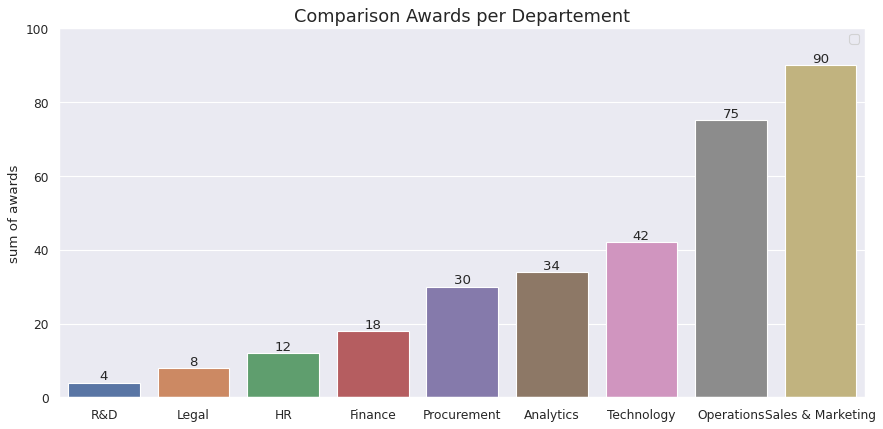

In [64]:
sns.set(style="darkgrid")
figure(figsize=(13, 6), dpi=80)

ax1 = sns.barplot(x='department',y='awards_won',data=dfp_awards)
ax1.bar_label(ax1.containers[0])
ax1.set_ylim(0,100)
plt.legend()
plt.ylabel('sum of awards')
plt.xlabel('')
plt.title('Comparison Awards per Departement', fontsize=16)

**Conc =**
- Sales Marketing is the best division and the second is Operation. If the awards is related to their KPI, it means the company is in good revenue.
- Even R&D is filled by Young Age and Master's Degree, they only have 4 awards.

## Data Preparation Before Modelling

In [65]:
dft[['education','gender']].sample(5)

,education,gender
18599,Bachelor's,m
1190,Bachelor's,m
38026,Bachelor's,m
34,Master's & above,f
14894,Bachelor's,m


In [66]:
dft['education'].unique()

array(["Bachelor's", "Master's & above", 'Below Secondary'], dtype=object)

In [67]:
mapping_gender = {
    'f' : 0,
    'm' : 1
}
mapping_education = {
    'Below Secondary' : 0,
    "Bachelor's" : 1,
    "Master's & above" : 2
}

dft['gender'] = dft['gender'].map(mapping_gender)
dft['education'] = dft['education'].map(mapping_education)
dft.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
1,39657,Finance,region_29,1,1,other,2,26,3.0,1,0,58,0
2,16937,Operations,region_22,1,0,sourcing,2,29,3.0,1,0,62,0
3,69661,Analytics,region_4,2,1,other,1,32,4.0,5,0,84,0
4,11746,Sales & Marketing,region_26,1,0,other,1,31,3.0,5,0,49,0
5,45506,Sales & Marketing,region_13,2,1,other,1,42,3.0,12,0,53,0


<AxesSubplot:>

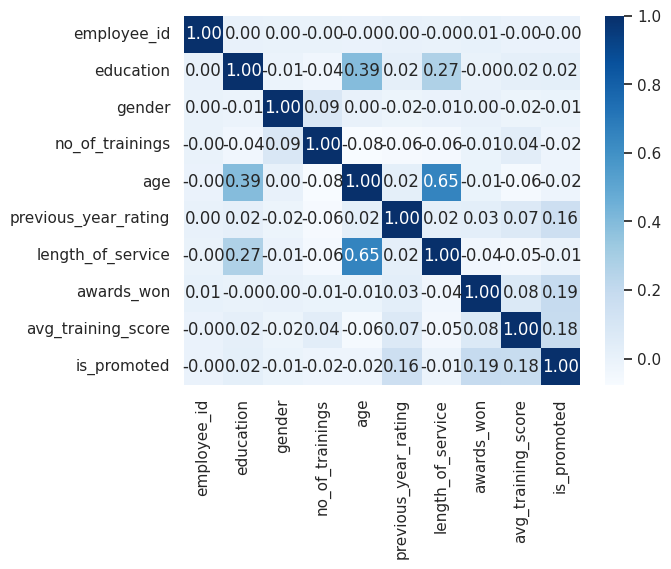

In [68]:
sns.heatmap(dft.corr(), cmap='Blues', annot=True, fmt='.2f')

## Feature Selection

In [69]:
dft.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [70]:
nums = ['education','gender','no_of_trainings','age','previous_year_rating','length_of_service',
        'awards_won','avg_training_score','is_promoted']
cats = ['department','region','recruitment_channel']

In [71]:
dft['is_promoted'].value_counts()

0    34980
1     3352
Name: is_promoted, dtype: int64

In [72]:
3352/dft['is_promoted'].count()*100

8.744651987895232

**Conc =**
The data is very unbalance. Data employee that promoted is only 8.74%. So we need handle this.

### Split the Data

We split the data first before oversampling to keep data test still original.

In [73]:
dft.drop(columns=['employee_id'], inplace=True)

In [74]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38332 entries, 1 to 40099
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            38332 non-null  object 
 1   region                38332 non-null  object 
 2   education             38332 non-null  int64  
 3   gender                38332 non-null  int64  
 4   recruitment_channel   38332 non-null  object 
 5   no_of_trainings       38332 non-null  int64  
 6   age                   38332 non-null  int64  
 7   previous_year_rating  38332 non-null  float64
 8   length_of_service     38332 non-null  int64  
 9   awards_won            38332 non-null  int64  
 10  avg_training_score    38332 non-null  int64  
 11  is_promoted           38332 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 3.8+ MB


check cardinality

In [75]:
for i in dft[cats]:
    print(i+':')
    print(dft[i].nunique())

department:
9
region:
34
recruitment_channel:
3


In [76]:
X = dft[nums].drop(columns=['is_promoted'])
y = dft['is_promoted']

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size = 0.8, random_state = 42)

**Feature selection with Chi Square Test**

In [78]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_selector = SelectKBest(chi2, k=4) 
chi2_selector.fit(X_train, y_train)

cols = chi2_selector.get_support(indices=True)
df_selected_features = X_train.iloc[:,cols]

In [79]:
df_selected_features.columns

Index(['age', 'previous_year_rating', 'awards_won', 'avg_training_score'], dtype='object')

**Feature selection with RFE**

In [80]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model = LogisticRegression()

# Create the RFE object and select 3 attributes
#rfe = RFE(model, 3)
rfe = RFE(estimator=model, n_features_to_select=3)
rfe = rfe.fit(X_train, y_train)

# Print the selected features
print(rfe.support_)

[ True False False False  True False  True False]


In [81]:
X_train.columns

Index(['education', 'gender', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score'],
      dtype='object')

**Feature selection with KBest**

In [82]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Create the feature selector
selector = SelectKBest(k=3)
# Fit the feature selector to the training data
selector.fit(X_train, y_train)
# Transform the training and test sets
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)
# Create a logistic regression model
model = LogisticRegression()
# fit the model on the selected features
model.fit(X_train_selected, y_train)
# evaluate the performance on the test set
score = model.score(X_test_selected, y_test)
print(f"Test score: {score:.3f}")


Test score: 0.914


In [83]:
selector.scores_

array([  25.18508376,    1.826735  ,   18.53439178,    7.64770447,
        769.75879844,    3.53786423, 1165.82729729, 1108.86819869])

In [84]:
X_train.columns

Index(['education', 'gender', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score'],
      dtype='object')

In [85]:
dft.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [86]:
fs = pd.DataFrame()

In [87]:
fs['cols'] = X_test.columns

In [88]:
fs

,cols
0,education
1,gender
2,no_of_trainings
3,age
4,previous_year_rating
5,length_of_service
6,awards_won
7,avg_training_score


In [89]:
selector.scores_

array([  25.18508376,    1.826735  ,   18.53439178,    7.64770447,
        769.75879844,    3.53786423, 1165.82729729, 1108.86819869])

**Conc=**

We use KBest. The reason is very relate what we think about these features. We choose 3 features, previous_year_rating, awards_won, avg_training_score.

Beside this, I believe that performance is not related from educational background, gender, age and length of service.

In [90]:
selected_cols = ['previous_year_rating','awards_won','avg_training_score']

In [91]:
X_train = X_train[selected_cols]
X_test = X_test[selected_cols]

In [92]:
X_train.head()

,previous_year_rating,awards_won,avg_training_score
38203,4.0,0,59
39260,3.0,0,59
21640,5.0,0,83
25746,2.0,0,76
34549,4.0,0,48


### Standarization

In [93]:
from sklearn.preprocessing import StandardScaler

cols = X_train.columns

scaler = StandardScaler().fit(X_train.values)
X_train[cols] = scaler.transform(X_train.values)

In [94]:
cols_test = X_test.columns

scaler = StandardScaler().fit(X_test.values)
X_test[cols_test] = scaler.transform(X_test.values)

### Balancing data

In [95]:
from sklearn.utils import resample
dft.is_promoted.value_counts()

0    34980
1     3352
Name: is_promoted, dtype: int64

In [96]:
!pip install imbalanced-learn

In [97]:
from imblearn.over_sampling import SMOTE

# instantiate the SMOTE object
sm = SMOTE(random_state=42)

# oversample the minority class using SMOTE
X_smote, y_smote = sm.fit_resample(X_train, y_train)

In [98]:
y_train.value_counts()

0    28007
1     2658
Name: is_promoted, dtype: int64

In [99]:
y_smote.value_counts()

0    28007
1    28007
Name: is_promoted, dtype: int64

In [100]:
X_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56014 entries, 0 to 56013
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   previous_year_rating  56014 non-null  float64
 1   awards_won            56014 non-null  float64
 2   avg_training_score    56014 non-null  float64
dtypes: float64(3)
memory usage: 1.3 MB


In [101]:
X_train_selected

array([[ 4.,  0., 59.],
       [ 3.,  0., 59.],
       [ 5.,  0., 83.],
       ...,
       [ 4.,  0., 64.],
       [ 4.,  0., 82.],
       [ 4.,  0., 55.]])

# Modeling

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [103]:
def eval_classification(model, xtrain, ytrain, xtest, ytest):
    ypred = model.predict(xtest)
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, ypred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, ypred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, ypred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, ypred))
    
    y_pred_proba = model.predict_proba(xtest)
    print("AUC: %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))

In [104]:
# Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_smote, y_smote)
y_train_hat = model.predict(X_smote)
y_test_hat = model.predict(X_test)

eval_classification(model_lr, X_smote, y_smote, X_test, y_test)

Accuracy (Test Set): 0.67
Precision (Test Set): 0.16
Recall (Test Set): 0.63
F1-Score (Test Set): 0.25
AUC: 0.72


In [105]:
# Random Forest
model_rf = RandomForestClassifier(n_jobs=-1,random_state=123)
model_rf.fit(X_smote, y_smote)
y_train_hat = model.predict(X_smote)
y_test_hat = model.predict(X_test)

eval_classification(model_rf, X_smote, y_smote, X_test, y_test)

Accuracy (Test Set): 0.52
Precision (Test Set): 0.12
Recall (Test Set): 0.67
F1-Score (Test Set): 0.20
AUC: 0.62


In [106]:
# Neural nets
model_mlpc = MLPClassifier()
model_mlpc.fit(X_smote, y_smote)
y_train_hat = model.predict(X_smote)
y_test_hat = model.predict(X_test)

eval_classification(model_mlpc, X_smote, y_smote, X_test, y_test)

Accuracy (Test Set): 0.82
Precision (Test Set): 0.24
Recall (Test Set): 0.47
F1-Score (Test Set): 0.32
AUC: 0.73


In [107]:
# K-Neighbors
model_kn = KNeighborsClassifier()
model_kn.fit(X_smote, y_smote)
y_train_hat = model.predict(X_smote)
y_test_hat = model.predict(X_test)

eval_classification(model_kn, X_smote, y_smote, X_test, y_test)

Accuracy (Test Set): 0.20
Precision (Test Set): 0.10
Recall (Test Set): 0.96
F1-Score (Test Set): 0.18
AUC: 0.53


In [108]:
# K-Neighbors
model_kn = KNeighborsClassifier()
model_kn.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

eval_classification(model_kn, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.91
Precision (Test Set): 0.52
Recall (Test Set): 0.13
F1-Score (Test Set): 0.21
AUC: 0.63


In [109]:
!pip install xgboost

In [110]:
#XGBoost
from xgboost import XGBClassifier

model_xgb = XGBClassifier(random_state=123)
model_xgb.fit(X_smote, y_smote)
y_train_hat = model.predict(X_smote)
y_test_hat = model.predict(X_test)

eval_classification(model_xgb, X_smote, y_smote, X_test, y_test)

Accuracy (Test Set): 0.17
Precision (Test Set): 0.10
Recall (Test Set): 0.97
F1-Score (Test Set): 0.18
AUC: 0.64


In [111]:
#XGBoost without SMOTE
from xgboost import XGBClassifier

model_xg = XGBClassifier(random_state=123)
model_xg.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

eval_classification(model_xg, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.92
Precision (Test Set): 0.73
Recall (Test Set): 0.12
F1-Score (Test Set): 0.21
AUC: 0.73


In [112]:
# Extra Trees
from sklearn.ensemble import ExtraTreesClassifier

model_xt = ExtraTreesClassifier(random_state=123)
model_xt.fit(X_smote, y_smote)
y_train_hat = model.predict(X_smote)
y_test_hat = model.predict(X_test)

eval_classification(model_xt, X_smote, y_smote, X_test, y_test)

Accuracy (Test Set): 0.55
Precision (Test Set): 0.13
Recall (Test Set): 0.66
F1-Score (Test Set): 0.21
AUC: 0.61


In [113]:
# Extra Trees without SMOTE
from sklearn.ensemble import ExtraTreesClassifier

model_x = ExtraTreesClassifier(random_state=123)
model_x.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

eval_classification(model_x, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.92
Precision (Test Set): 0.69
Recall (Test Set): 0.12
F1-Score (Test Set): 0.21
AUC: 0.73


In [114]:
!pip install lightgbm

In [115]:
#Lightgbm with is_unbalance is True
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, y_train)
params = {'is_unbalance': True, 'scale_pos_weight': sum(y_train==0)/sum(y_train==1)}

# Train the LightGBM model
model_lgbm = lgb.train(params, lgb_train)

#eval_classification(model_lgbm, X_train, y_train, X_test, y_test)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 30665, number of used features: 3
[LightGBM] [Info] Start training from score 0.086679


In [116]:
# Make predictions on the test set
y_pred = model_lgbm.predict(X_test)

# Convert the predictions to binary labels
y_pred = [1 if p > 0.5 else 0 for p in y_pred]

# Evaluate the model performance
accuracy = sum(y_pred == y_test) / len(y_test)
print('Accuracy:', accuracy)

Accuracy: 0.9166557975740185


In [117]:
precision_score(y_test, y_pred)

0.7433628318584071

In [118]:
f1_score(y_test, y_pred)

0.20817843866171004

**I choose XGBoost for modeling and data without SMOTE**

# Finding the best employee

In [119]:
dfp.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score', 'age_cats'],
      dtype='object')

In [120]:
data_2022 = dfp[selected_cols]

In [121]:
cols = data_2022.columns

scaler = StandardScaler().fit(data_2022.values)
data_2022[cols] = scaler.transform(data_2022.values)

In [122]:
data_2022['is_promoted'] = model_xg.predict(data_2022)

In [123]:
data_2022.is_promoted.value_counts()

0    13835
1      231
Name: is_promoted, dtype: int64

In [124]:
round(231/13835*100,2)

1.67

**>> 1.67% employees is considered promoted**

In [125]:
dfp['is_promoted'] = data_2022['is_promoted']

In [126]:
best_em = dfp[(dfp.is_promoted == 1) & (dfp.awards_won == 1)][['employee_id','department','length_of_service',
                                                              'previous_year_rating','avg_training_score']]

In [127]:
best_em = best_em.reset_index()
best_em.drop(columns=['index'], inplace=True)

In [128]:
best_em.head()

,employee_id,department,length_of_service,previous_year_rating,avg_training_score
0,56183,Analytics,9,5.0,89
1,3572,Procurement,5,5.0,72
2,62252,Legal,7,2.0,89
3,78218,Sales & Marketing,6,4.0,93
4,26222,Technology,5,2.0,73


## We're Using Composite Performance Index to 

In [129]:
b1 = (1 + 1/2 + 1/3)/3
b2 = (1/2 + 1/3)/3
b3 = (1/3)/3

In [130]:
best_em['b1'] = best_em['previous_year_rating']/best_em['previous_year_rating'].min()*100
best_em['b2'] = best_em['avg_training_score']/best_em['avg_training_score'].min()*100
best_em['b3'] = best_em['length_of_service']/best_em['length_of_service'].min()*100

In [131]:
best_em.head()

,employee_id,department,length_of_service,previous_year_rating,avg_training_score,b1,b2,b3
0,56183,Analytics,9,5.0,89,500.0,153.448276,900.0
1,3572,Procurement,5,5.0,72,500.0,124.137931,500.0
2,62252,Legal,7,2.0,89,200.0,153.448276,700.0
3,78218,Sales & Marketing,6,4.0,93,400.0,160.344828,600.0
4,26222,Technology,5,2.0,73,200.0,125.862069,500.0


In [132]:
best_em['tot_score'] = best_em['b1']*b1+best_em['b2']*b2+best_em['b3']*b3

In [133]:
best_em = best_em.sort_values('tot_score', ascending=False)

In [134]:
best_em.head(3)

,employee_id,department,length_of_service,previous_year_rating,avg_training_score,b1,b2,b3,tot_score
87,25576,Technology,19,4.0,92,400.0,158.620690,1900.0,499.616858
56,48831,Operations,13,5.0,73,500.0,125.862069,1300.0,484.961686
39,32222,Analytics,17,4.0,92,400.0,158.620690,1700.0,477.394636


**>> The Top Three for Employee 2022 is 25576, 48831, 32222**

In [135]:
best_dep = dfp_ori.groupby('department').agg({'employee_id':
                                              'count'}).sort_values('department',ascending=False).reset_index()

In [136]:
best_dep['emp_prom'] = best_em.groupby('department').agg({'employee_id':
                                                          'count'}).sort_values('department',ascending=False).reset_index()['employee_id']

In [137]:
best_dep['percentage'] = round(best_dep['emp_prom']/best_dep['employee_id']*100,2)

In [138]:
best_dep.sort_values('percentage', ascending=False)

,department,employee_id,emp_prom,percentage
8,Analytics,1434,24,1.67
5,Legal,296,3,1.01
0,Technology,1909,18,0.94
3,Procurement,1878,11,0.59
4,Operations,3073,15,0.49
7,Finance,664,3,0.45
1,Sales & Marketing,4515,18,0.40
2,R&D,257,1,0.39
6,HR,681,1,0.15


**>> The Top Three for Employee 2022 is Analytics, Legal, and Technology**

from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_smote, X_test, y_smote, y_test)
models

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

from xgboost import XGBClassifier

model = XGBClassifier(random_state=123)
model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))


# Using TPOT

In [139]:
from tpot import TPOTClassifier

In [140]:
pipeline_optimizer = TPOTClassifier()

In [141]:
pipeline_optimizer = TPOTClassifier(generations=5, population_size=20, cv=5,
                                    random_state=42, verbosity=2)

In [142]:
pipeline_optimizer.fit(X_train, y_train)


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9237567259090168

Generation 2 - Current best internal CV score: 0.9237567259090168

Generation 3 - Current best internal CV score: 0.9237567259090168

Generation 4 - Current best internal CV score: 0.9238219468449372

Generation 5 - Current best internal CV score: 0.9238219468449372

Best pipeline: GradientBoostingClassifier(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), learning_rate=0.1, max_depth=2, max_features=0.2, min_samples_leaf=11, min_samples_split=4, n_estimators=100, subsample=0.45)


TPOTClassifier(generations=5, population_size=20, random_state=42, verbosity=2)

In [143]:
print(pipeline_optimizer.score(X_test, y_test))


0.9170470849093517


In [190]:
pipeline_optimizer.score(X_test, y_test)

0.9170470849093517

In [144]:
pipeline_optimizer.export('tpot_exported_pipeline.py')

In [152]:
X_new = data_2022.drop(columns=['is_promoted'])

In [158]:
y_proba = pipeline_optimizer.predict(X_new)

In [159]:
y_proba

array([0, 0, 0, ..., 0, 0, 0])

In [160]:
X_new['is_promoted'] = y_proba

In [161]:
X_new.head()

,previous_year_rating,awards_won,avg_training_score,is_promoted
0,-0.264757,-0.15086,0.412802,0
1,1.389284,-0.15086,-0.941373,0
2,-0.264757,-0.15086,-0.038589,0
3,-1.918798,-0.15086,1.616514,0
4,-0.264757,-0.15086,-0.640445,0


In [162]:
X_new.is_promoted.value_counts()

0    13826
1      240
Name: is_promoted, dtype: int64

In [163]:
round(240/13835*100,2)

1.73

In [164]:
data_2022['tpot'] = y_proba

In [166]:
data_2022.sample(5)

,previous_year_rating,awards_won,avg_training_score,is_promoted,tpot
9976,-0.264757,-0.150860,-0.790909,0,0
12737,-0.264757,-0.150860,-0.264285,0,0
13094,-0.264757,6.628672,-0.189053,0,0
9456,1.389284,-0.150860,0.713730,0,0
2254,-0.264757,-0.150860,0.187107,0,0


In [169]:
data_2022.is_promoted.value_counts()

0    13835
1      231
Name: is_promoted, dtype: int64

In [178]:
round(231/data_2022.is_promoted.count()*100,2)

1.64

In [179]:
data_2022.tpot.value_counts()

0    13826
1      240
Name: tpot, dtype: int64

In [180]:
round(240/data_2022.tpot.count()*100,2)

1.71

In [168]:
data_2022[(data_2022.is_promoted == 1) & (data_2022.tpot == 1)].count()

previous_year_rating    218
awards_won              218
avg_training_score      218
is_promoted             218
tpot                    218
dtype: int64

In [174]:
data_2022[((data_2022.is_promoted == 1) & (data_2022.tpot == 0)) |
          ((data_2022.is_promoted == 0) & (data_2022.tpot == 1))].count()

previous_year_rating    35
awards_won              35
avg_training_score      35
is_promoted             35
tpot                    35
dtype: int64

In [187]:
data_2022[((data_2022.is_promoted == 1) &
           (data_2022.tpot == 0))]['is_promoted'].count()

13

In [188]:
data_2022[((data_2022.is_promoted == 0) &
           (data_2022.tpot == 1))]['tpot'].count()

22

In [189]:
1.71-1.64

0.07000000000000006